In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes = True)

# Plotting composition of data

## Static Composition

In [2]:
p = sns.load_dataset('penguins')

In [3]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
c = p.groupby('species')['species'].count()

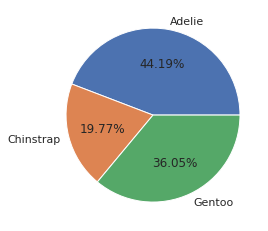

In [5]:
plt.pie(c,labels = c.index, autopct="%.2f%%");
plt.show()

In [6]:
c.index

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species')

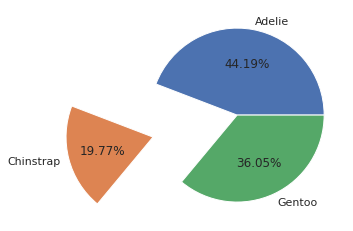

In [7]:
plt.pie(c,labels = c.index, autopct="%.2f%%", explode=[0,1,0]);
plt.show()

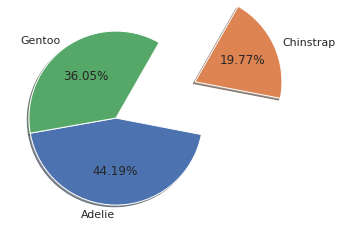

In [8]:
plt.pie(c,labels = c.index, autopct="%.2f%%", explode=[0,1,0], startangle=190, shadow = True);
plt.show()

### Donut chart

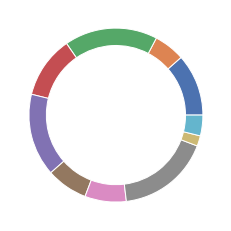

In [9]:
plt.pie(np.random.randint(0,10,10), wedgeprops=dict(width=0.2));
plt.show()

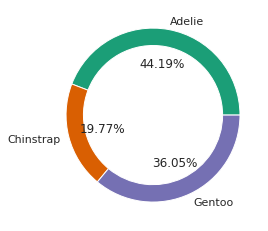

In [10]:
cmap = plt.get_cmap('Dark2')
my_colors = cmap(np.arange(10))
plt.pie(c,
        autopct="%.2f%%",
        labels = c.index,
        wedgeprops=dict(width=0.2),
       colors = my_colors);
plt.show()

In [11]:
c = pd.crosstab(p.species,p.island)

In [12]:
c = c.T

In [13]:
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


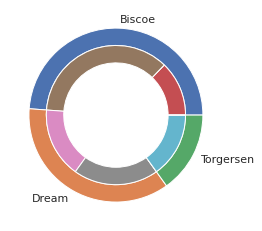

In [14]:
plt.pie(c.sum(axis=1), labels = c.index, radius =1, wedgeprops = dict(width=0.2));
plt.pie(c.values.flatten(), radius = 0.8,wedgeprops = dict(width=0.2));

In [15]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0,4,8]))
inner_colors = cmap(np.array([1,2,3,5,6,7,9,10,11]))

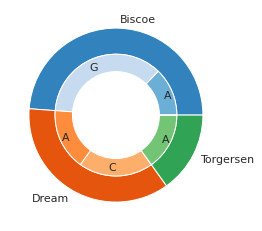

In [16]:
plt.pie(c.sum(axis=1), labels = c.index, radius =1, wedgeprops = dict(width=0.3), colors = outer_colors);
plt.pie(c.values.flatten(), labels = ['A','','G','A','C','','A','',''],radius = 0.7,wedgeprops = dict(width=0.2), colors = inner_colors, labeldistance =0.85);

## Stacked Bar Plot


In [105]:
url = 'https://api.covid19india.org/states_daily.json'
import urllib.request
import json
urllib.request.urlretrieve(url, 'data.json')
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)


In [18]:
df.tail(3)

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
1131,1,984,1,37,211,248,2665,26-Mar-21,2021-03-26,0,...,3,Confirmed,518,1971,0,62276,0,1028,186,646
1132,0,306,0,26,133,138,654,26-Mar-21,2021-03-26,0,...,2,Recovered,204,1131,0,30341,0,247,161,361
1133,0,2,0,0,2,4,22,26-Mar-21,2021-03-26,0,...,0,Deceased,3,9,0,292,0,6,1,4


In [19]:
df_ = df.tail(3)
df_.drop(['date','dateymd'],axis =1, inplace = True)
df_.set_index('status',inplace = True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt',inplace = True)

/home/shanmukh/.local/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df_

status,Confirmed,Recovered,Deceased
an,1,0,0
ap,984,306,2
ar,1,0,0
as,37,26,0
br,211,133,2
ch,248,138,4
ct,2665,654,22
dd,0,0,0
dl,1534,971,9
dn,17,1,0


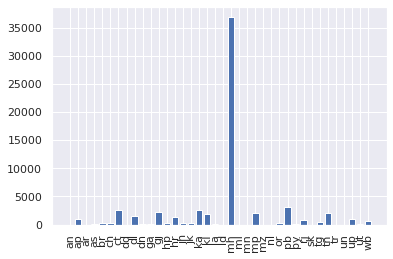

In [21]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation= 90);

In [22]:
plt.gcf?

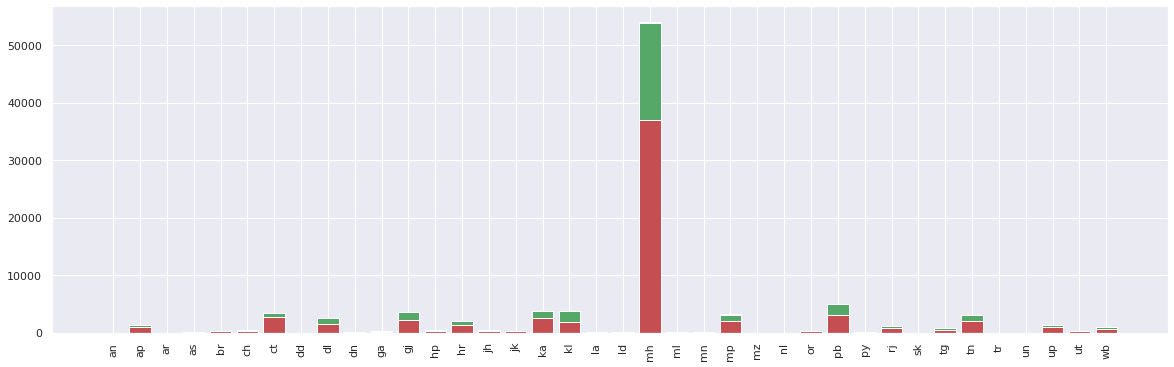

In [23]:
fig = plt.gcf();
fig.set_size_inches(20,6);
plt.bar(df_.index, df_.Confirmed, color = 'r');
plt.bar(df_.index, df_.Recovered, bottom = df_.Confirmed, color ='g');
plt.bar(df_.index, df_.Deceased, bottom = df_.Confirmed + df_.Recovered, color = 'b')
plt.xticks(rotation= 90);

In [24]:
lol = np.array(df_.index, dtype = str)
df_.index = np.char.upper(lol)

In [25]:
df_.index

Index(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DD', 'DL', 'DN', 'GA', 'GJ',
       'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP',
       'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'UN', 'UP',
       'UT', 'WB'],
      dtype='object')

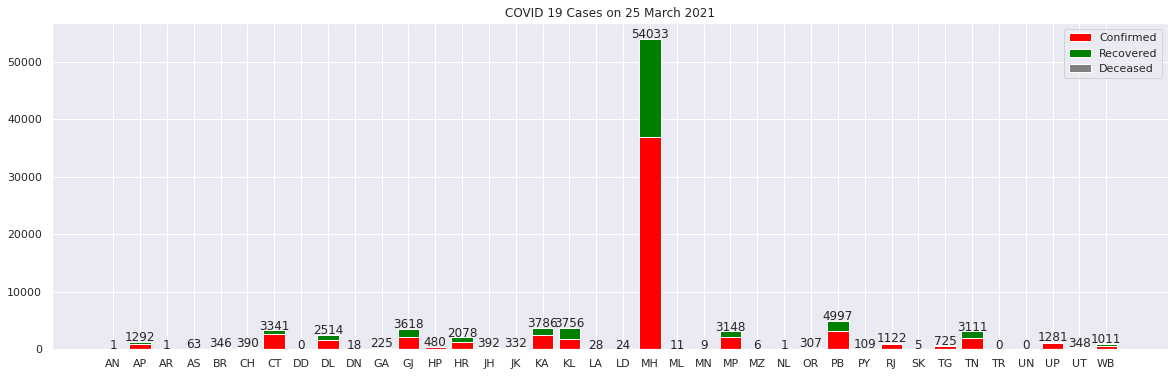

In [26]:
fig = plt.gcf();
#df_.drop('mh',inplace=True)
fig.set_size_inches(20,6);
plt.bar(df_.index, df_.Confirmed,color ='red',label = 'Confirmed');
plt.bar(df_.index, df_.Recovered, bottom = df_.Confirmed,color ='green', label ='Recovered');
plt.bar(df_.index, df_.Deceased, bottom = df_.Confirmed + df_.Recovered,color ='grey', label ='Deceased')
plt.title('COVID 19 Cases on 25 March 2021')
plt.legend()
#plt.xticks(rotation= 90);
for i,val in enumerate(df_.index):
    y = df_.loc[val].sum()
    x = i
    plt.text(x,y+100,str(y), ha ='center');

## Relative stacked bar plot


In [27]:
df_.head()

status,Confirmed,Recovered,Deceased
AN,1,0,0
AP,984,306,2
AR,1,0,0
AS,37,26,0
BR,211,133,2


In [28]:
df_['Total'] = df_.sum(axis=1)

In [29]:
df_.head()

status,Confirmed,Recovered,Deceased,Total
AN,1,0,0,1
AP,984,306,2,1292
AR,1,0,0,1
AS,37,26,0,63
BR,211,133,2,346


In [30]:
df_['ConfirmedFraction'] = df_['Confirmed']/df_['Total']
df_['RecoveredFraction'] = df_['Recovered']/df_['Total']
df_['DeceasedFraction'] = df_['Deceased']/df_['Total']
df_

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
AN,1,0,0,1,1.000000,0.000000,0.000000
AP,984,306,2,1292,0.761610,0.236842,0.001548
AR,1,0,0,1,1.000000,0.000000,0.000000
AS,37,26,0,63,0.587302,0.412698,0.000000
BR,211,133,2,346,0.609827,0.384393,0.005780
CH,248,138,4,390,0.635897,0.353846,0.010256
CT,2665,654,22,3341,0.797665,0.195750,0.006585
DD,0,0,0,0,NaN,NaN,NaN
DL,1534,971,9,2514,0.610183,0.386237,0.003580
DN,17,1,0,18,0.944444,0.055556,0.000000


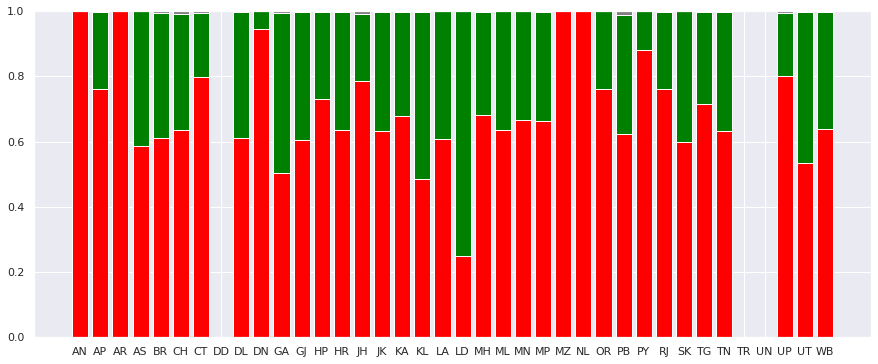

In [31]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index,df_.ConfirmedFraction, color ='Red');
plt.bar(df_.index,df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color ='Green');
plt.bar(df_.index,df_.DeceasedFraction,bottom= df_.ConfirmedFraction + df_.RecoveredFraction, color ='Grey');
#plt.xticks(rotation = 90);

In [32]:
df_ = df_.sort_values('ConfirmedFraction', ascending =False)

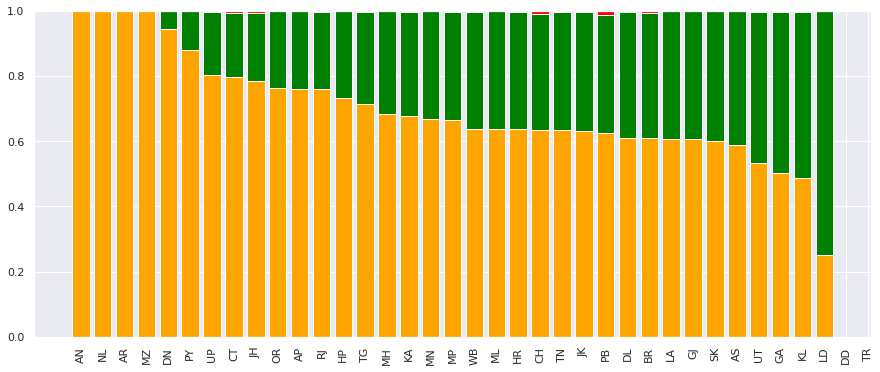

In [33]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index,df_.ConfirmedFraction, color ='Orange');
plt.bar(df_.index,df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color ='Green');
plt.bar(df_.index,df_.DeceasedFraction,bottom= df_.ConfirmedFraction + df_.RecoveredFraction, color ='Red');
plt.xticks(rotation = 90);

## Time Varying Composition of Data

## Stacked Area Plots

In [106]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [35]:
dft = df[['tg','date','status']]

In [36]:
dft.head()

,tg,date,status
0,1,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,2,15-Mar-20,Confirmed
4,1,15-Mar-20,Recovered


In [37]:
dft['tg'] = pd.to_numeric(dft['tg'])
dft['date'] = pd.to_datetime(dft['date'])
dft.head()

<ipython-input-37-3ccbdac31541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['tg'] = pd.to_numeric(dft['tg'])
<ipython-input-37-3ccbdac31541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['date'] = pd.to_datetime(dft['date'])


,tg,date,status
0,1,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,2,2020-03-15,Confirmed
4,1,2020-03-15,Recovered


In [38]:
# date cnf recov deceased
dft = dft.pivot_table(values = 'tg', columns = 'status', index ='date')
dft.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,1,0,0
2020-03-15,2,0,1
2020-03-16,1,0,0
2020-03-17,1,0,0
2020-03-18,8,0,0


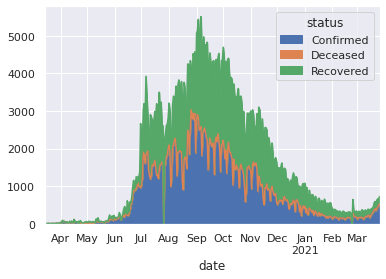

In [39]:
dft.plot.area();

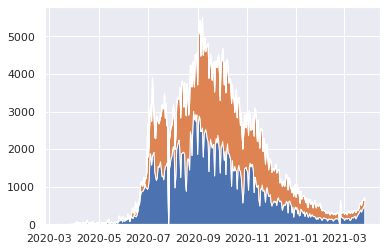

In [40]:
plt.stackplot(dft.index, dft.Confirmed, dft.Recovered, dft.Deceased);

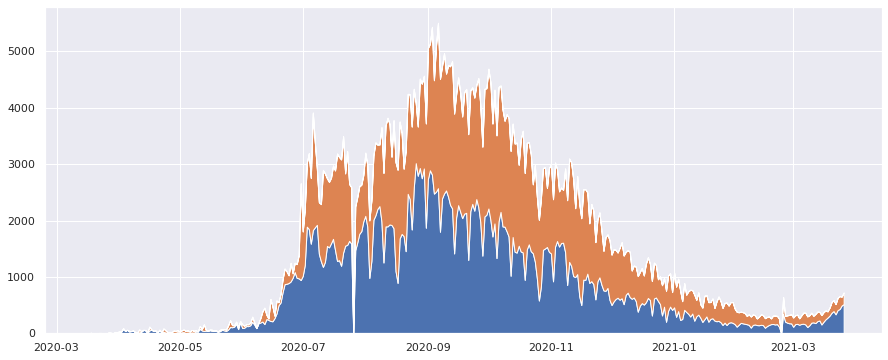

In [41]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(dft.index, dft.Confirmed, dft.Recovered, dft.Deceased);

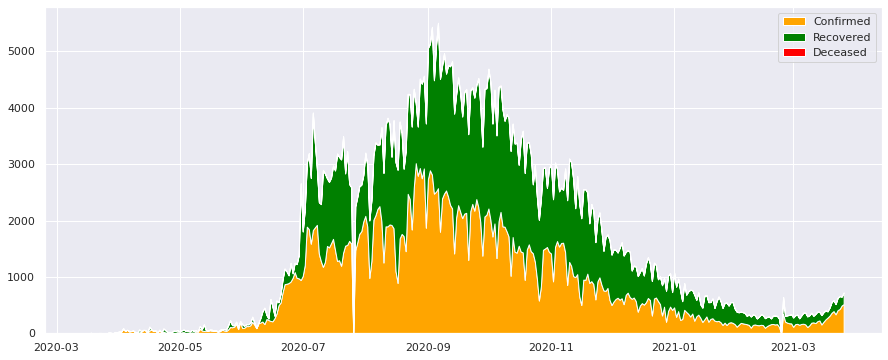

In [42]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(dft.index, dft.Confirmed, dft.Recovered, dft.Deceased, colors=['Orange','Green','Red'], labels =['Confirmed', 'Recovered', 'Deceased']);
plt.legend();

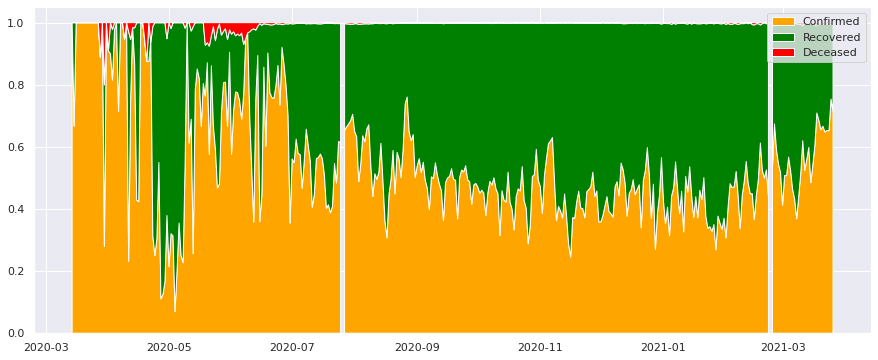

In [43]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(dft.index, dft.Confirmed/dft.sum(axis=1), dft.Recovered/dft.sum(axis=1), dft.Deceased/dft.sum(axis=1), colors=['Orange','Green','Red'], labels =['Confirmed', 'Recovered', 'Deceased']);
plt.legend();

# Scatter Plot

In [44]:
t = sns.load_dataset('tips')

In [45]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


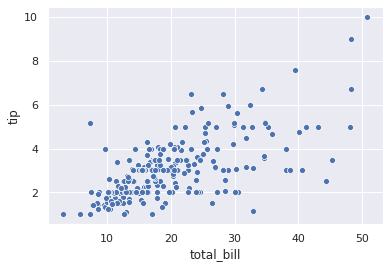

In [46]:
sns.scatterplot(x='total_bill',y='tip',data=t)

In [47]:
t['tip_fraction'] =t['tip']/t['total_bill']

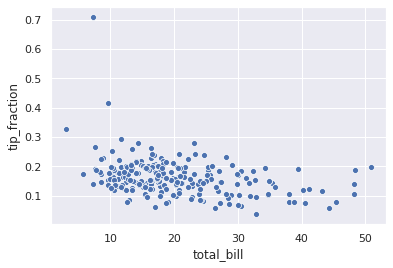

In [48]:
sns.scatterplot(x='total_bill',y='tip_fraction',data=t)

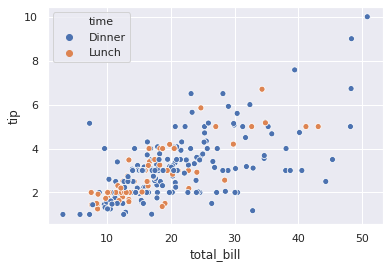

In [49]:
sns.scatterplot(x='total_bill',y='tip',data=t, hue='time')

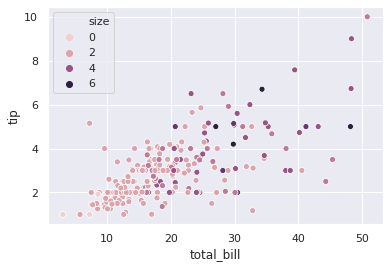

In [50]:
sns.scatterplot(x='total_bill',y='tip',data=t, hue='size');

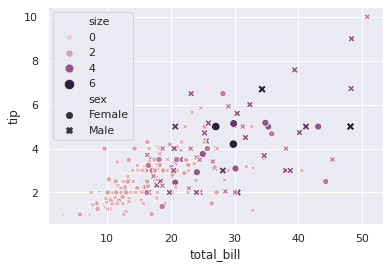

In [51]:
sns.scatterplot(x='total_bill',y='tip',data=t, hue='size',style ='sex', size='size');

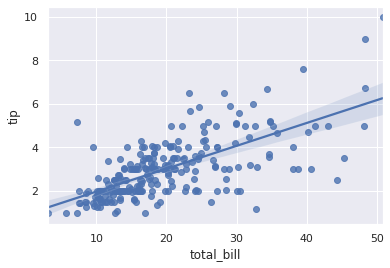

In [52]:
sns.regplot(x='total_bill',y='tip',data=t)

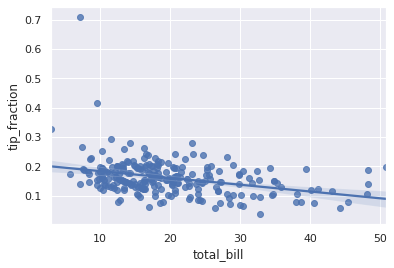

In [53]:
sns.regplot(x='total_bill',y='tip_fraction',data=t)

In [54]:
d = sns.load_dataset('diamonds')

In [55]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


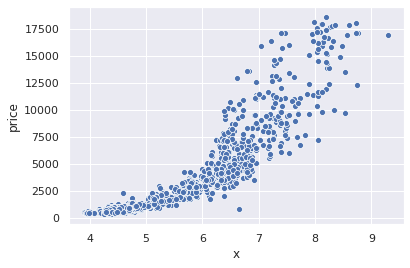

In [56]:
sns.scatterplot('x','price',data=d.sample(1000));

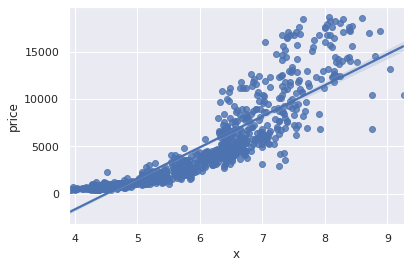

In [57]:
sns.regplot('x','price',data=d.sample(1000));

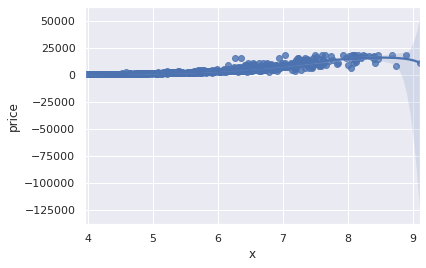

In [58]:
sns.regplot('x','price',data=d.sample(1000),order=10);

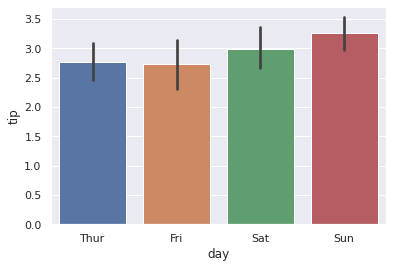

In [59]:
sns.barplot(x='day',y='tip',data=t)

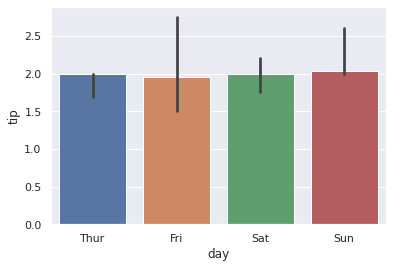

In [60]:
def my_estimate(x):
    return np.quantile(x,0.25)
sns.barplot(x='day',y='tip',data=t,estimator=my_estimate);

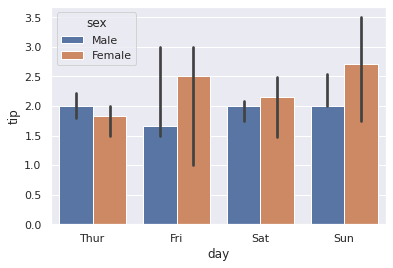

In [61]:
sns.barplot(x='day',y='tip',data=t,estimator=my_estimate,hue='sex');

In [62]:
d['x_q'] = pd.cut(d['x'],bins=7);

In [63]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.069, 4.603]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.069, 4.603]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.069, 4.603]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.069, 4.603]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(3.069, 4.603]"


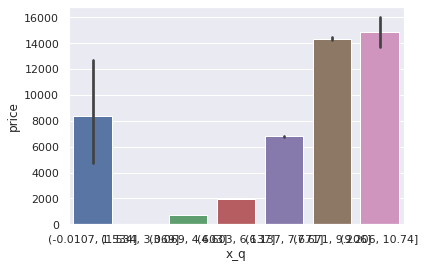

In [64]:
sns.barplot('x_q','price',data=d);


# Line Plot

In [65]:
f = sns.load_dataset('fmri')

In [69]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


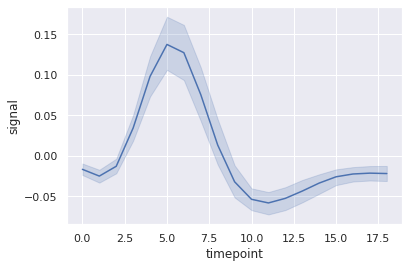

In [70]:
sns.lineplot('timepoint','signal',data=f)

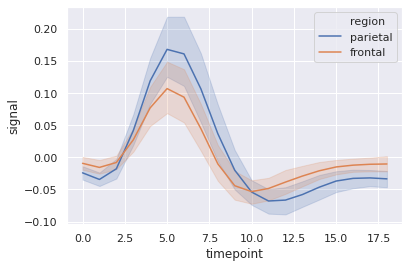

In [71]:
sns.lineplot('timepoint','signal',data=f,hue='region');

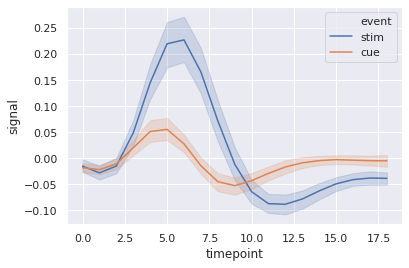

In [72]:
sns.lineplot('timepoint','signal',data=f,hue='event');

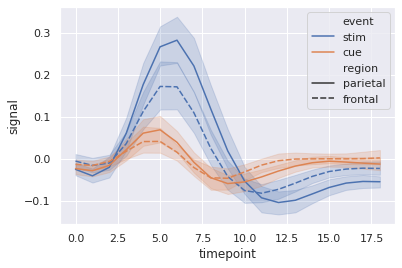

In [73]:
sns.lineplot('timepoint','signal',data=f,hue='event',style='region');

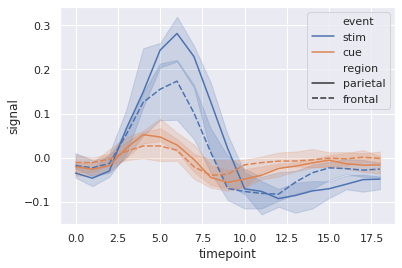

In [74]:
sns.lineplot('timepoint','signal',data=f,hue='event',style='region',estimator=np.median);

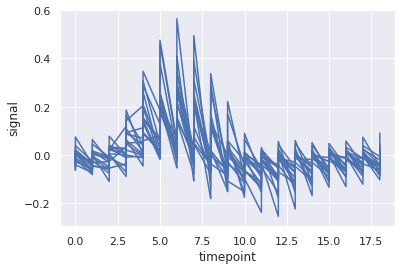

In [77]:
sns.lineplot('timepoint','signal',data=f,units='subject',estimator=None);

In [79]:
f_ = f[(f.region=='parietal') & (f.event == 'cue')]

In [80]:
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


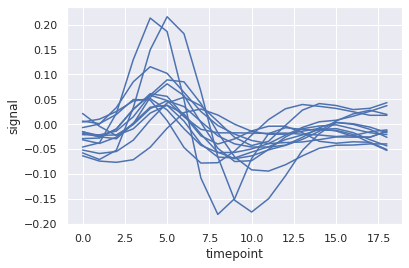

In [81]:
sns.lineplot('timepoint','signal',data=f_,units='subject',estimator=None);

In [82]:
x= np.arange(-3,4)

In [84]:
y = x**2

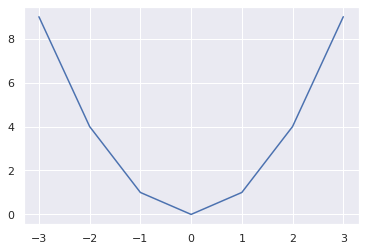

In [85]:
sns.lineplot(x,y)

In [112]:
df = pd.json_normalize(data)

In [113]:
df['date']= pd.to_datetime(df['date'])
df.drop('tt',axis = 1,inplace=True)
df.set_index('date',inplace= True)
df = df[df['status']=='Confirmed']
df.drop('status',axis=1,inplace= True )
#df = df.apply(pd.to_numeric)
df.reset_index(inplace = True)

In [119]:
df.drop('dateymd',axis=1,inplace = True)

In [121]:
df.set_index('date',inplace= True)
df.head()

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,0,3,0,1,1,0,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,...,0,3,0,8,1,0,0,2,1,0


In [122]:
df = df.apply(pd.to_numeric)

In [124]:
df.reset_index(inplace=True)

In [125]:
df2 = pd.melt(df, id_vars ='date',value_vars= list(df.columns).remove('date'), var_name='state',value_name='Confirmed')

In [126]:
df2

,date,state,Confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0
...,...,...,...
14359,2021-03-22,wb,368
14360,2021-03-23,wb,404
14361,2021-03-24,wb,462
14362,2021-03-25,wb,516


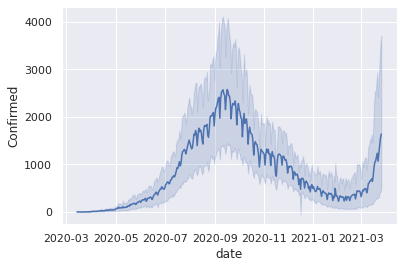

In [127]:
sns.lineplot('date','Confirmed',data=df2)

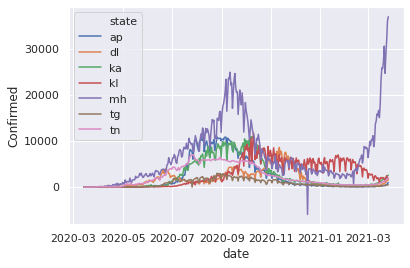

In [134]:
states =['mh','tn','dl','tg','ap','kl','ka']
df2 = df2[df2.state.isin(states)]
sns.lineplot('date','Confirmed',data=df2,hue='state');

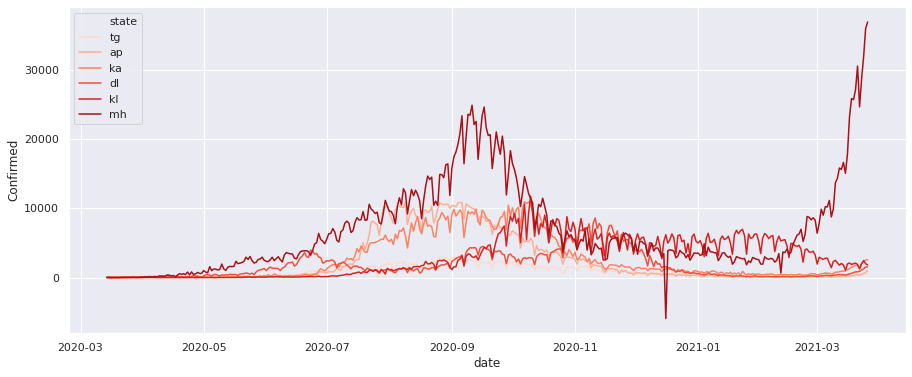

In [136]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.lineplot('date','Confirmed',data=df2,hue='state',palette='Reds', hue_order =['tg','ap','ka','dl','kl','mh']);

# Heat Map


In [137]:
x = np.random.rand(10,10)

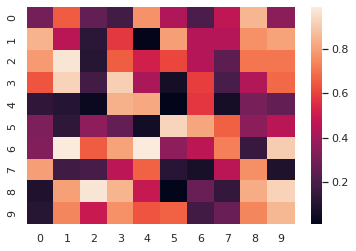

In [139]:
sns.heatmap(x)

In [141]:
fl = sns.load_dataset('flights')

In [144]:
fl.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [146]:
fl_ = fl.pivot('year','month','passengers')

In [147]:
fl_.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


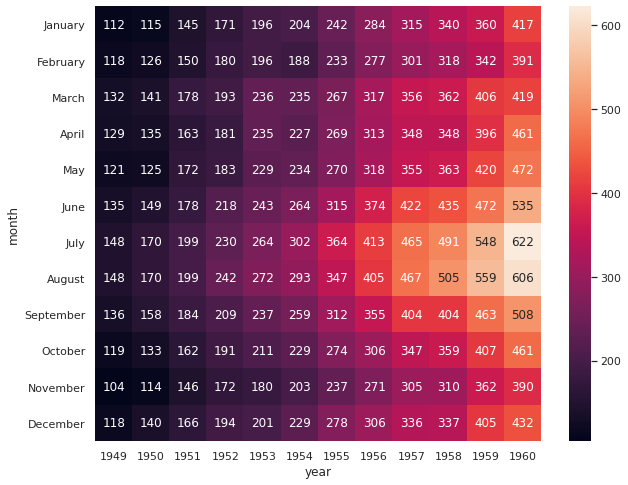

In [151]:
fig = plt.gcf();
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot = True, fmt='d');

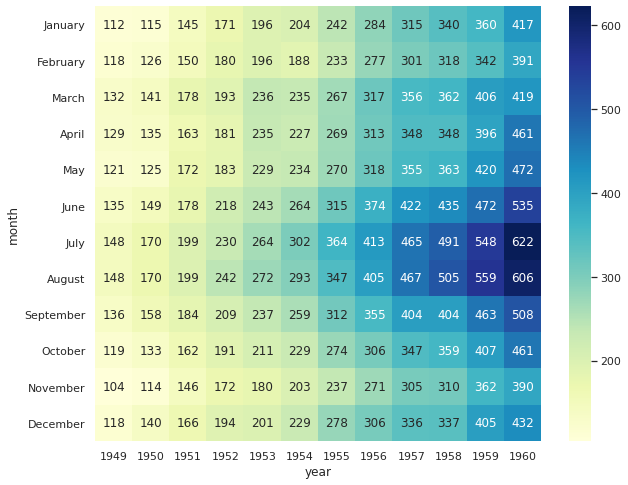

In [153]:
fig = plt.gcf();
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot = True, fmt='d', cmap ='YlGnBu');

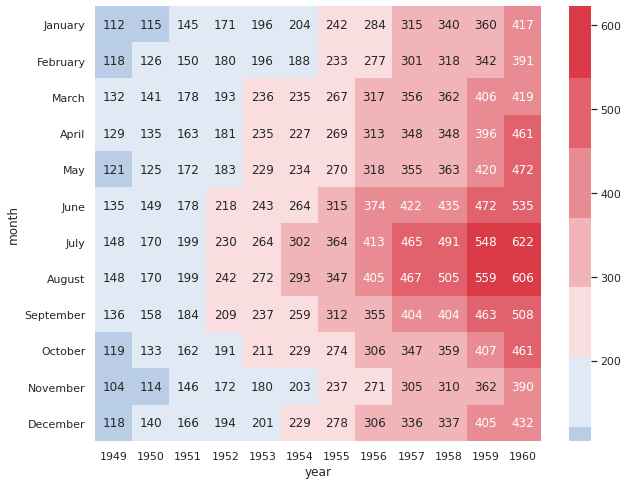

In [158]:
fig = plt.gcf();
fig.set_size_inches(10,8)
sns.heatmap(fl_.T, annot = True, fmt='d', cmap = sns.diverging_palette(250,10,n=10), center = fl_.loc[1954,'January']);